## karura demo

In [1]:
# Render our plots inline
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "../"))
import pandas as pd


# Read the dataset to dataframe
FILE_NAME = "../tests/data/titanic_train.csv"

df = pd.read_csv(FILE_NAME)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from karura.core.auto_run import AutoRun
import karura.core.insights as I


# Now, construct the pipeline of insights
insights = [
    I.NAFrequencyCheckInsight(),
    I.CategoricalItemInsight(),
    I.DatetimeToCategoricalInsight(),
    I.CategoryReductionInsight(),
    I.NumericalScalingInsight(),
    I.CategoricalToDummyInsight(),
    I.LabelFormatInsight(),
    I.FeatureSelectionInsight(),
    I.ModelSelectionInsight()
]

karura = AutoRun(df, insights)

In [4]:
karura.set_target("Survived")
karura.ignore(["PassengerId", "Ticket", "Name"])

## Execute Machine Learning

Cabin は欠損値が多い項目のため、除外されました
Sex,Embarked,Pclass,SibSp,Parch,Survived は分類項目として処理しました
項目Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,Parch_0,Parch_2,Embarked_Cは予測に有効な項目です。これらを利用し、モデルを構築します。
モデルの精度は0.755です(利用モデル:RandomForestClassifier)。各項目の貢献度は図のようになっています。


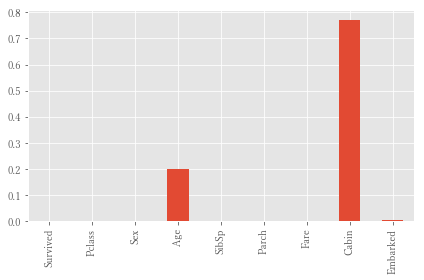

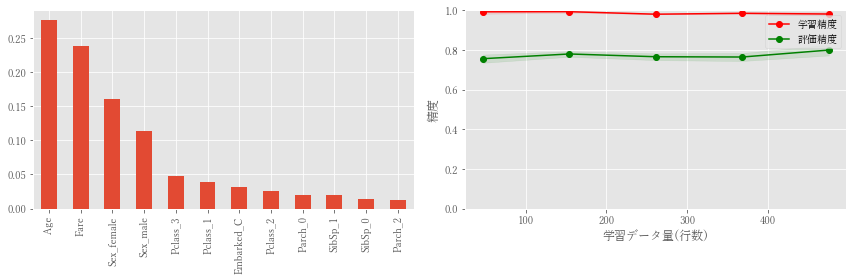

In [5]:
descriptions = karura.execute()
for d in descriptions:
    print(d)
        
result = karura.result()